In [26]:
#Libraries

import math
import cmath
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image
import IPython.display
import time

# Projeto 3 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Cristiano Tolentino Santos
## Matrícula: 211028050

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [27]:
#Usefull signals

def δ(n):
    if n == 0:
        return 1
    else:
        return 0

def u(n):
    if n >= 0:
        return 1
    else:
        return 0

def convolucao(h, x):
    y = []
    for i in range(len(h) + len(x)):
        elemento = 0
        for j in range(len(h) + len(x)):
            if i - j >= 0:
                if (j > (len(h)-1)) and ((i - j) > (len(x)-1)):
                    elemento += 0 * 0
                elif j > (len(h)-1):
                    elemento += 0 * x[i - j]
                elif (i - j) > (len(x)-1):
                    elemento += h[j] * 0
                else:
                    elemento += h[j] * x[i - j]
        y.append(elemento) 
    return y


# Questão 1

Considere um sinal $x\left(t\right) = 8 \cdot \text{ret}\left(t\right)$, onde:

$$ \begin{align}
	\text{ret}\left(x\right) = \begin{cases}
                               0 & \text{se} ~~ \left|x\right| > \frac{1}{2} \\
															 \frac{1}{2} & \text{se} ~~ \left|x\right| = \frac{1}{2} \\
															 1 & \text{se} ~~ \left|x\right| < \frac{1}{2} \\
                             \end{cases}
\end{align}                             
$$

Considere que o sinal será amostrado a uma taxa $T = \frac{1}{8}$ s, e que queremos uma resolução na frequência de $f_0 = \frac{1}{4}$ Hz. 



## Questão 1a (1.0 ponto)

Obtenha o sinal $x\left[n\right]$, como uma amostragem de $x\left(t\right)$ .

x[n]


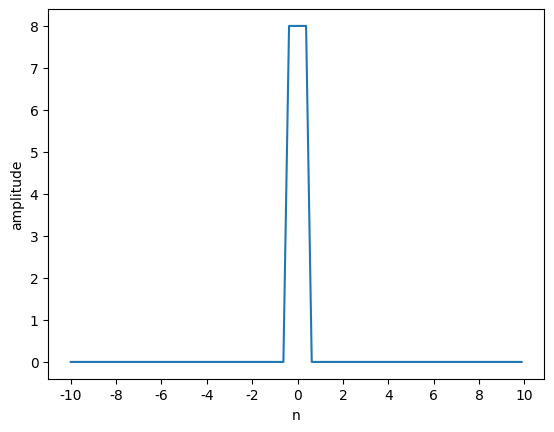

In [28]:
def ret1(t):
    if abs(t) > (1/2):
        return 0
    elif abs(t) == (1/2):
        return (1/2)
    elif abs(t) < (1/2):
        return 1

x = []

for i in range(-80, 80):
    t = i/8
    x.append(8*ret1(t))

print("Grpafico de x[n]")
plt.plot(x)
plt.xticks([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160], ["-10", "-8", "-6", "-4", "-2", "0", "2", "4", "6", "8", "10"])
plt.xlabel("n")
plt.ylabel("amplitude")
plt.show()

## Questão 1b (1.0 ponto)

Compare a transformada de Fourier real do sinal $x\left(t\right)$ com a Transformada Discreta de Fourier obtida a partir de $x\left[n\right]$ . 

In [29]:
#Resposta da questão 1b

# Questão 2

Considere um sinal $x\left[n\right]$ com $N = 256$ amostras, onde: 
$$
\begin{align}
	x\left[n\right] = \begin{cases}
                               1 & \text{se} ~~ n < 64 \\
															 0 & \text{se} ~~ n \geq 64 \\															 
                             \end{cases}
\end{align}
$$

Considere agora um filtro passa-baixas ideal $H_1$ com frequência de corte normalizada igual a $\frac{1}{16}$.

## Questão 2a (1.0  ponto)

Filtre o sinal $x\left[n\right]$ com o filtro $H_1$, obtendo o sinal $y\left[n\right]$. Compare o sinal original $x\left[n\right]$ com o sinal obtido $y\left[n\right]$. 

In [30]:
#Resposta da questão 2a

## Questão 2b (1.0 ponto)

Compare o espectro do sinal $x\left[n\right]$ com o espectro do sinal $y\left[n\right]$. 

In [31]:
#Resposta da questão 2b

## Questão 2c (1.0  ponto)

Aplique o filtro $H_1$ no sinal contido no arquivo "noisy_ecg2.mat". Plote o sinal original e o sinal filtrado, bem como seus espectros.


In [32]:
#Resposta da questão 2c

sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()

# Questão 3 (5.0 pontos)

O teclado de um touch-fone usa sinais de diferentes frequências para especificar quais botões foram pressionados. O teclado tem 12 botões, em um arranjo de quatro linhas e três colunas. Quando um botão é pressionado um sinal é gerado pela soma de dois tons senoidais com frequências diferentes. A frequência mais alta indica a coluna da tecla pressionada, enquanto a menor frequência indica a linha da tecla pressionada. As frequências são geradas de acordo com a tabela:

| | | Coluna | |
| :-: | :-: | :-: | :-: |
| Linha | 1209 Hz | 1336 Hz | 1477 Hz |
| 697 Hz | 1 | 2 | 3 |
| 770 Hz | 4 | 5 | 6 |
| 852 Hz | 7 | 8 | 9 |
| 940 Hz | | 0 | |

A frequência de amostragem é de 8192 Hz, e o som de cada tecla dura um segundo. Escreva um programa que decodifique, de forma automática, um sinal composto por um número de telefone gerado com essas características. Teste o seu programa com os sinais encontrados no arquivo "touch_fone.mat".


In [33]:
#Resposta da questão 3

sinal1 = sp.io.loadmat('touch_fone.mat')['x'].ravel()
sinal2 = sp.io.loadmat('touch_fone.mat')['y'].ravel()
sinal3 = sp.io.loadmat('touch_fone.mat')['z'].ravel()
